In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv('D:\Chools\Day_10\claimants.csv')

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\cgunj\AppData\Local\Temp\ipykernel_16860\921505215.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv('D:\Chools\Day_10\claimants.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [4]:
df.isnull().any()

CASENUM     False
ATTORNEY    False
CLMSEX       True
CLMINSUR     True
SEATBELT     True
CLMAGE       True
LOSS        False
dtype: bool

In [5]:
df.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [8]:
columns_to_impute1 = ['CLMSEX', 'CLMINSUR', 'SEATBELT']

for column in columns_to_impute1:
    df[column].fillna(df[column].mode()[0], inplace=True)

C:\Users\cgunj\AppData\Local\Temp\ipykernel_16860\3972657987.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [9]:
df = df.drop('CASENUM', axis=1)

In [10]:
df.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [11]:
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


C:\Users\cgunj\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\cgunj\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\cgunj\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\cgunj\A

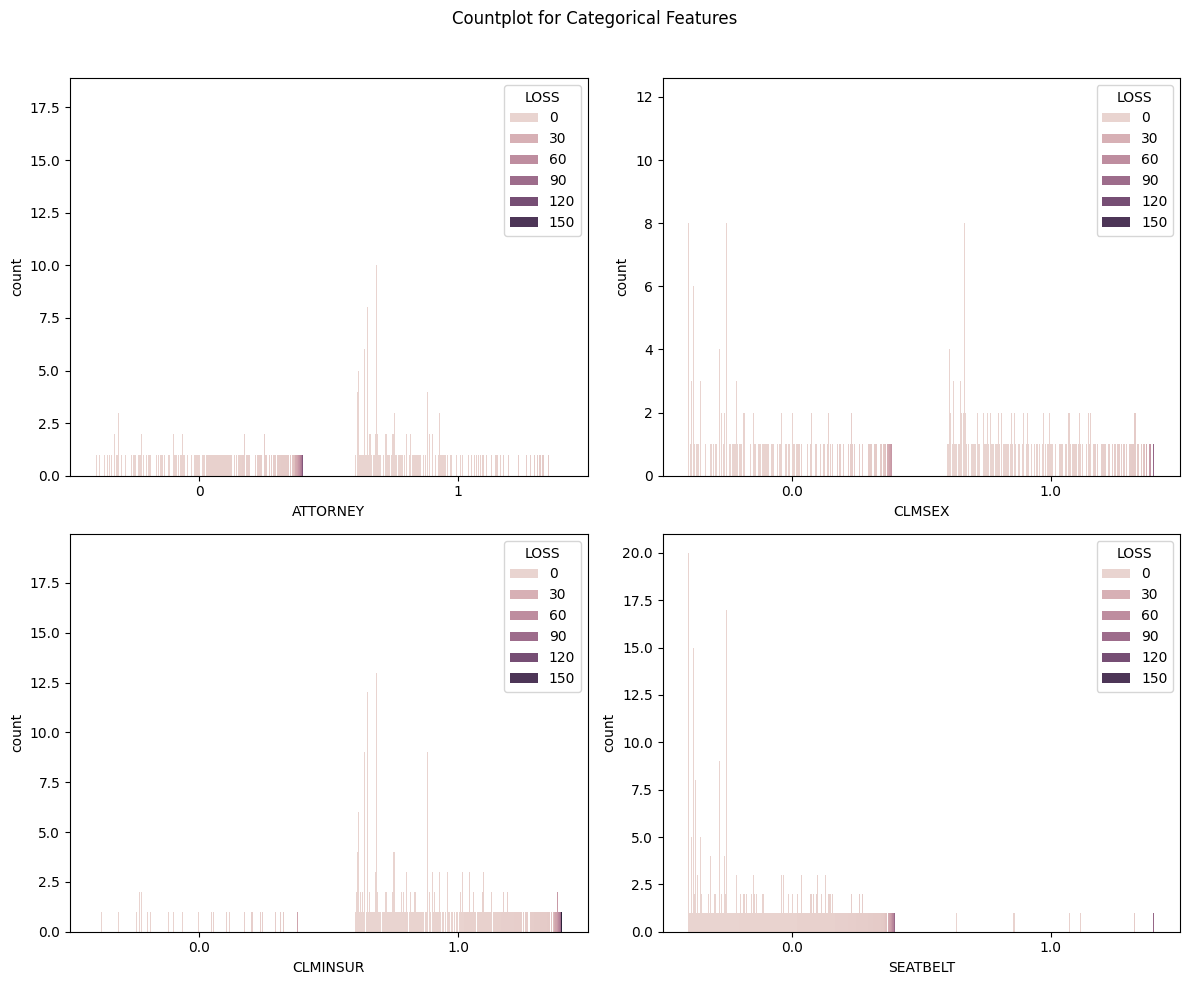

In [12]:
categorical_features = ['ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle("Countplot for Categorical Features")
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='LOSS', data=df, ax=axes[i // 2, i % 2])
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

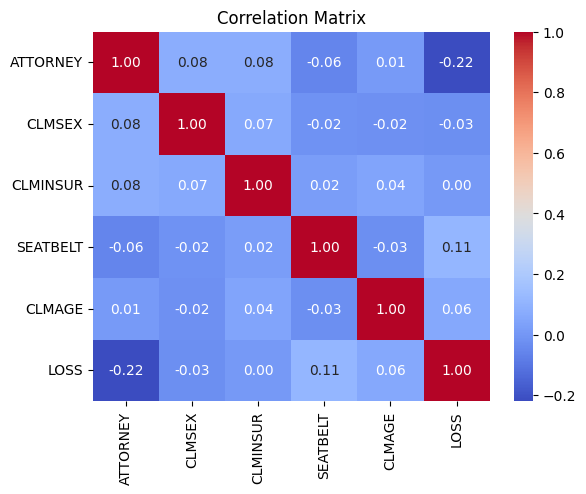

In [13]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [14]:
X = df.drop(columns=['ATTORNEY'])
y = df['ATTORNEY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
iso_forest = IsolationForest(contamination=0.01)
iso_forest.fit(X_train)


IsolationForest(contamination=0.01)

In [16]:
y_pred = iso_forest.predict(X_test)


In [17]:
y_pred_binary = [1 if pred == 1 else 0 for pred in y_pred]


In [18]:
print(y_pred_binary)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

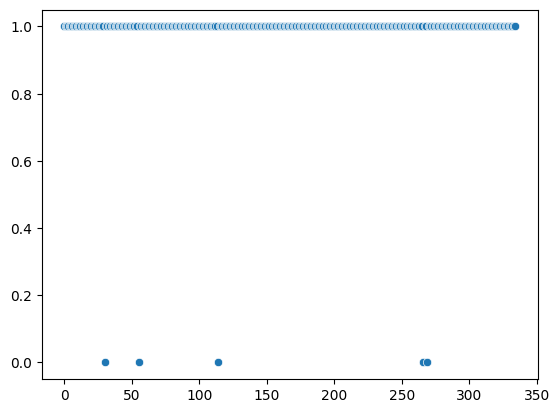

In [19]:
import matplotlib.pyplot as plt
sns.scatterplot(x=range(len(y_pred_binary)), y=y_pred_binary)
plt.show()


In [20]:
decision_tree = DecisionTreeClassifier(max_depth=3, min_samples_split=5, min_samples_leaf=2, class_weight='balanced')
decision_tree.fit(X_train, y_train)

y_pred_decision_tree = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.7313432835820896


In [21]:
import pandas as pd
bins = [0, 18, 35, 50, 100]
labels = ['0-18', '19-35', '36-50', '51-100']
df['CLMAGE_GROUP'] = pd.cut(df['CLMAGE'], bins=bins, labels=labels, right=False)
df = pd.get_dummies(df, columns=['CLMAGE_GROUP'], prefix='CLMAGE_GROUP', drop_first=True)


In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
 'criterion': ['gini', 'entropy'],
 'max_depth': [3],
 'min_samples_split': [5],
 'min_samples_leaf': [2],
 'class_weight': ['balanced']
}


dt_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

dt_model_best = DecisionTreeClassifier(random_state=42, **best_params)
dt_model_best.fit(X_train, y_train)
y_pred_best = dt_model_best.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

print(f"Best Parameters: {best_params}")
print(f"Accuracy after tuning: {accuracy_best:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_best}")
print(f"Classification Report:\n{classification_rep_best}")

Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy after tuning: 0.73
Confusion Matrix:
[[123  41]
 [ 49 122]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       164
           1       0.75      0.71      0.73       171

    accuracy                           0.73       335
   macro avg       0.73      0.73      0.73       335
weighted avg       0.73      0.73      0.73       335



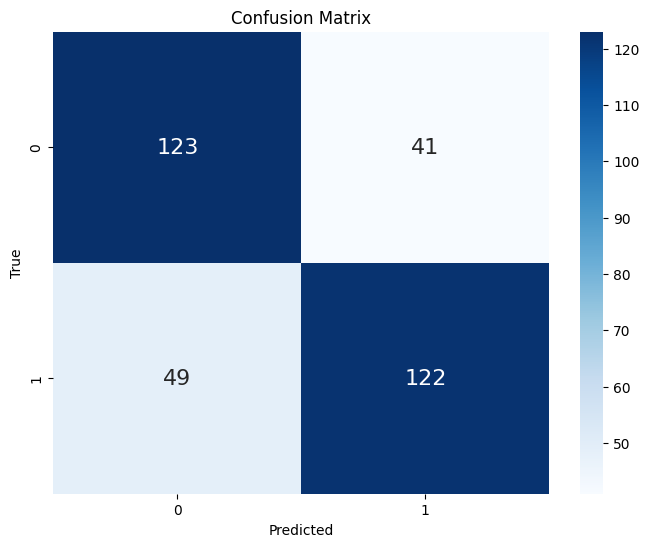

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()